# Introduction

In this notebook, we set out to ascertain the generalisability of our data and analysis to the broader TCR space.
We compared sequence properties of our dataset to a background of TCR sequences sampled from [OTS](https://opig.stats.ox.ac.uk/webapps/ots/ots_paired/) and also look at how the selected structures fit in the overall available TCR structures space.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def rmsd(x: np.ndarray) -> float:
    '''Compute the RMSD of an array.'''
    x_bar = np.mean(x)
    n = len(x)
    return np.sqrt(np.sum((x - x_bar) ** 2) / n)

# Load Data

## Load OTS data

In [3]:
ots_sample = pd.read_csv('../data/interim/ots_sample.csv')
ots_sample

,cdr1_aa_alpha,cdr2_aa_alpha,cdr3_aa_alpha,cdr1_aa_beta,cdr2_aa_beta,cdr3_aa_beta,v_call_alpha,v_call_beta,j_call_alpha,j_call_beta,sample_num
0,TISGNEY,GLKNN,IVRVVWGGGADGLT,SGHDN,FVKESK,ASSLLGVSTDTQY,TRAV26-1*01,TRBV14*01,TRAJ45*01,TRBJ2-3*01,1
1,NSMFDY,ISSIKDK,AASAQGGSYIPT,LGHDT,YNNKEL,ASSRRPTDTQY,TRAV29/DV5*04,TRBV3-1*01,TRAJ6*01,TRBJ2-3*01,1
2,SSNFYA,MTLNGDE,ALGRNSGNTPLV,SGHAT,FQNNGV,ASNLAGAYEQY,TRAV24*01,TRBV11-2*01,TRAJ29*01,TRBJ2-7*01,1
3,SSVPPY,YTTGATLV,AVSEPGSQGNLI,DFQATT,SNEGSKA,SALGQPLGETQY,TRAV8-4*01,TRBV20-1*02,TRAJ42*01,TRBJ2-5*01,1
4,TSGFNG,NVLDGL,AVRDLRGSQGNLI,MGHRA,YSYEKL,ASSQAPQGADTQY,TRAV1-2*01,TRBV4-1*01,TRAJ42*01,TRBJ2-3*01,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,SSVSVY,YLSGSTLV,AVSVRGSQGNLI,MNHNY,SVGAGI,ASSYGNREGYT,TRAV8-6*01,TRBV6-6*01,TRAJ42*01,TRBJ1-2*01,10
9996,NSAFQY,TYSSGN,AMRRNTNAGKST,DFQATT,SNEGSKA,SAPTDPAGTEAF,TRAV12-3*01,TRBV20-1*01,TRAJ27*01,TRBJ1-1*01,10
9997,SVFSS,VVTGGEV,AAIIQGAQKLV,MDHEN,SYDVKM,ASSYQYYEQY,TRAV27*01,TRBV28*01,TRAJ54*01,TRBJ2-7*01,10
9998,DSAIYN,IQSSQRE,APYSGGGADGLT,SEHNR,FQNEAQ,ASSSGTGGVEHGYT,TRAV21*02,TRBV7-9*01,TRAJ45*01,TRBJ1-2*01,10


In [4]:
ots_sample_genes = ots_sample[['v_call_alpha', 'v_call_beta', 'j_call_alpha', 'j_call_beta', 'sample_num']].copy()

ots_sample_genes['alpha_subgroup'] = ots_sample_genes['v_call_alpha'].str.extract(r'^(TRAV\d+)')
ots_sample_genes['beta_subgroup'] = ots_sample_genes['v_call_beta'].str.extract(r'^(TRBV\d+)')

ots_sample_genes

,v_call_alpha,v_call_beta,j_call_alpha,j_call_beta,sample_num,alpha_subgroup,beta_subgroup
0,TRAV26-1*01,TRBV14*01,TRAJ45*01,TRBJ2-3*01,1,TRAV26,TRBV14
1,TRAV29/DV5*04,TRBV3-1*01,TRAJ6*01,TRBJ2-3*01,1,TRAV29,TRBV3
2,TRAV24*01,TRBV11-2*01,TRAJ29*01,TRBJ2-7*01,1,TRAV24,TRBV11
3,TRAV8-4*01,TRBV20-1*02,TRAJ42*01,TRBJ2-5*01,1,TRAV8,TRBV20
4,TRAV1-2*01,TRBV4-1*01,TRAJ42*01,TRBJ2-3*01,1,TRAV1,TRBV4
...,...,...,...,...,...,...,...
9995,TRAV8-6*01,TRBV6-6*01,TRAJ42*01,TRBJ1-2*01,10,TRAV8,TRBV6
9996,TRAV12-3*01,TRBV20-1*01,TRAJ27*01,TRBJ1-1*01,10,TRAV12,TRBV20
9997,TRAV27*01,TRBV28*01,TRAJ54*01,TRBJ2-7*01,10,TRAV27,TRBV28
9998,TRAV21*02,TRBV7-9*01,TRAJ45*01,TRBJ1-2*01,10,TRAV21,TRBV7


In [5]:
ots_sample_cdrs = ots_sample.filter(regex=r'^cdr\d_aa_[alpha|beta]', axis=1)
cdr_cols = ots_sample_cdrs.columns.tolist()

ots_sample_cdrs = pd.concat([ots_sample_cdrs, ots_sample['sample_num']], axis='columns')

ots_sample_cdrs = ots_sample_cdrs.melt(id_vars='sample_num',
                                       value_vars=cdr_cols,
                                       var_name='cdr_type',
                                       value_name='sequence')
ots_sample_cdrs[['cdr', 'chain_type']] = ots_sample_cdrs['cdr_type'].str.extract('cdr(\d)_aa_(alpha|beta)')

ots_sample_cdrs['length'] = ots_sample_cdrs['sequence'].str.len()

ots_sample_cdrs

,sample_num,cdr_type,sequence,cdr,chain_type,length
0,1,cdr1_aa_alpha,TISGNEY,1,alpha,7
1,1,cdr1_aa_alpha,NSMFDY,1,alpha,6
2,1,cdr1_aa_alpha,SSNFYA,1,alpha,6
3,1,cdr1_aa_alpha,SSVPPY,1,alpha,6
4,1,cdr1_aa_alpha,TSGFNG,1,alpha,6
...,...,...,...,...,...,...
59995,10,cdr3_aa_beta,ASSYGNREGYT,3,beta,11
59996,10,cdr3_aa_beta,SAPTDPAGTEAF,3,beta,12
59997,10,cdr3_aa_beta,ASSYQYYEQY,3,beta,10
59998,10,cdr3_aa_beta,ASSSGTGGVEHGYT,3,beta,14


## Load STCRDab data

In [6]:
stcrdab_summary = pd.read_csv('../data/raw/stcrdab/db_summary.dat', delimiter='\t')
stcrdab_summary

,pdb,Bchain,Achain,Dchain,Gchain,TCRtype,model,antigen_chain,antigen_type,antigen_name,...,authors,resolution,method,r_free,r_factor,affinity,affinity_method,affinity_temperature,affinity_pmid,engineered
0,7zt2,E,D,NaN,NaN,abTCR,0,A | A,protein | Hapten,major histocompatibility complex class i-relat...,...,"Karuppiah, V., Srikannathasan, V., Robinson, R.A.",2.4,X-RAY DIFFRACTION,0.276,0.215,NaN,NaN,NaN,NaN,True
1,7zt3,E,D,NaN,NaN,abTCR,0,A,protein,major histocompatibility complex class i-relat...,...,"Karuppiah, V., Srikannathasan, V., Robinson, R.A.",2.4,X-RAY DIFFRACTION,0.236,0.191,NaN,NaN,NaN,NaN,True
2,7zt4,E,D,NaN,NaN,abTCR,0,A,protein,major histocompatibility complex class i-relat...,...,"Karuppiah, V., Robinson, R.A.",2.02,X-RAY DIFFRACTION,0.268,0.234,NaN,NaN,NaN,NaN,True
3,7zt5,E,D,NaN,NaN,abTCR,0,A,protein,major histocompatibility complex class i-relat...,...,"Karuppiah, V., Robinson, R.A.",2.09,X-RAY DIFFRACTION,0.266,0.225,NaN,NaN,NaN,NaN,True
4,7zt7,E,D,NaN,NaN,abTCR,0,A,protein,major histocompatibility complex class i-relat...,...,"Karuppiah, V., Robinson, R.A.",1.84,X-RAY DIFFRACTION,0.255,0.207,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,3rtq,D,C,NaN,NaN,abTCR,0,A,Hapten,"N-[(2S,3S,4R)-3,4-DIHYDROXY-1-{[(1S,2S,3R,4R,5...",...,"Yu, E.D., Zajonc, D.M.",2.8,X-RAY DIFFRACTION,0.268,0.227,NaN,NaN,NaN,NaN,True
932,3dxa,O,N,NaN,NaN,abTCR,0,M,peptide,ebv decapeptide epitope,...,"Archbold, J.K., Macdonald, W.A., Gras, S., Ros...",3.5,X-RAY DIFFRACTION,0.330,0.286,NaN,NaN,NaN,NaN,True
933,1d9k,B,A,NaN,NaN,abTCR,0,P,peptide,conalbumin peptide,...,"Reinherz, E.L., Tan, K., Tang, L., Kern, P., L...",3.2,X-RAY DIFFRACTION,0.293,0.247,NaN,NaN,NaN,NaN,True
934,4gg6,H,G,NaN,NaN,abTCR,0,J,peptide,peptide from alpha/beta-gliadin mm1,...,"Broughton, S.E., Theodossis, A., Petersen, J.,...",3.2,X-RAY DIFFRACTION,0.285,0.246,NaN,NaN,NaN,NaN,True


### Load *apo*-*holo* data

In [7]:
apo_holo_summary = pd.read_csv('../data/processed/apo-holo-tcr-pmhc-class-I/apo_holo_summary.csv')
apo_holo_summary

,file_name,pdb_id,structure_type,state,alpha_chain,beta_chain,antigen_chain,mhc_chain1,mhc_chain2,cdr_sequences_collated,peptide_sequence,mhc_slug
0,1ao7_D-E-C-A-B_tcr_pmhc.pdb,1ao7,tcr_pmhc,holo,D,E,C,A,B,DRGSQS-IYSNGD-AVTTDSWGKLQ-MNHEY-SVGAGI-ASRPGLA...,LLFGYPVYV,hla_a_02_01
1,1bd2_D-E-C-A-B_tcr_pmhc.pdb,1bd2,tcr_pmhc,holo,D,E,C,A,B,NSMFDY-ISSIKDK-AAMEGAQKLV-MNHEY-SVGAGI-ASSYPGG...,LLFGYPVYV,hla_a_02_01
2,1bii_A-B-P_pmhc.pdb,1bii,pmhc,apo,NaN,NaN,P,A,B,NaN,RGPGRAFVTI,h2_dd
3,1ddh_A-B-P_pmhc.pdb,1ddh,pmhc,apo,NaN,NaN,P,A,B,NaN,RGPGRAFVTI,h2_dd
4,1duz_A-B-C_pmhc.pdb,1duz,pmhc,apo,NaN,NaN,C,A,B,NaN,LLFGYPVYV,hla_a_02_01
...,...,...,...,...,...,...,...,...,...,...,...,...
353,8gon_D-E-C-A-B_tcr_pmhc.pdb,8gon,tcr_pmhc,holo,D,E,C,A,B,TSESDYY-QEAYKQQN-ASSGNTPLV-SGHNS-FNNNVP-ASTWGR...,NaN,NaN
354,8gop_A-B_tcr.pdb,8gop,tcr,apo,A,B,NaN,NaN,NaN,TSESDYY-QEAYKQQN-ASSGNTPLV-SGHNS-FNNNVP-ASTWGR...,NaN,NaN
355,8gvb_A-B-P-H-L_tcr_pmhc.pdb,8gvb,tcr_pmhc,holo,A,B,P,H,L,YGATPY-YFSGDTLV-AVGFTGGGNKLT-SEHNR-FQNEAQ-ASSD...,RYPLTFGW,hla_a_24_02
356,8gvg_A-B-P-H-L_tcr_pmhc.pdb,8gvg,tcr_pmhc,holo,A,B,P,H,L,YGATPY-YFSGDTLV-AVGFTGGGNKLT-SEHNR-FQNEAQ-ASSD...,RFPLTFGW,hla_a_24_02


In [8]:
apo_holo_genes = apo_holo_summary.copy().merge(
    stcrdab_summary,
    how='left',
    left_on=['pdb_id', 'alpha_chain', 'beta_chain'],
    right_on=['pdb', 'Achain', 'Bchain'],
).drop_duplicates(['cdr_sequences_collated'])[['alpha_subgroup', 'beta_subgroup']]

In [9]:
apo_holo_cdr_sequences = apo_holo_summary['cdr_sequences_collated'].str.split('-').apply(pd.Series)
apo_holo_cdr_sequences.columns = ['cdr1_alpha', 'cdr2_alpha', 'cdr3_alpha', 'cdr1_beta', 'cdr2_beta', 'cdr3_beta']

apo_holo_cdr_sequences = apo_holo_cdr_sequences.drop_duplicates()
apo_holo_cdr_sequences = apo_holo_cdr_sequences.dropna()

apo_holo_cdr_sequences
apo_holo_cdr_sequences = apo_holo_cdr_sequences.melt(value_vars=apo_holo_cdr_sequences.columns,
                                                     var_name='cdr_type',
                                                     value_name='sequence')
apo_holo_cdr_sequences[['cdr', 'chain_type']] = apo_holo_cdr_sequences['cdr_type'].str.extract('cdr(\d)_(alpha|beta)')

apo_holo_cdr_sequences['length'] = apo_holo_cdr_sequences['sequence'].str.len()

apo_holo_cdr_sequences

,cdr_type,sequence,cdr,chain_type,length
0,cdr1_alpha,DRGSQS,1,alpha,6
1,cdr1_alpha,NSMFDY,1,alpha,6
2,cdr1_alpha,TQDSSYF,1,alpha,7
3,cdr1_alpha,YSATPY,1,alpha,6
4,cdr1_alpha,TISGTDY,1,alpha,7
...,...,...,...,...,...
385,cdr3_beta,ASKVGPGQHNSPLH,3,beta,14
386,cdr3_beta,ASSYGTGINYGYT,3,beta,13
387,cdr3_beta,ASTWGRASTDTQY,3,beta,13
388,cdr3_beta,ASSDRDRVPETQY,3,beta,13


# Compare CDR Lengths

In [10]:
ots_sample_cdrs['source'] = 'OTS'
apo_holo_cdr_sequences['source'] = 'STCRDab'

cdr_lengths = pd.concat([ots_sample_cdrs, apo_holo_cdr_sequences])
cdr_lengths

,sample_num,cdr_type,sequence,cdr,chain_type,length,source
0,1.0,cdr1_aa_alpha,TISGNEY,1,alpha,7,OTS
1,1.0,cdr1_aa_alpha,NSMFDY,1,alpha,6,OTS
2,1.0,cdr1_aa_alpha,SSNFYA,1,alpha,6,OTS
3,1.0,cdr1_aa_alpha,SSVPPY,1,alpha,6,OTS
4,1.0,cdr1_aa_alpha,TSGFNG,1,alpha,6,OTS
...,...,...,...,...,...,...,...
385,NaN,cdr3_beta,ASKVGPGQHNSPLH,3,beta,14,STCRDab
386,NaN,cdr3_beta,ASSYGTGINYGYT,3,beta,13,STCRDab
387,NaN,cdr3_beta,ASTWGRASTDTQY,3,beta,13,STCRDab
388,NaN,cdr3_beta,ASSDRDRVPETQY,3,beta,13,STCRDab


In [11]:
ots_sample_cdrs_proptions = (ots_sample_cdrs.groupby(['chain_type', 'cdr', 'sample_num'])
                                            ['length']
                                            .value_counts(normalize=True)
                                            * 100)
ots_sample_cdrs_proptions.name = 'percentage'
ots_sample_cdrs_proptions = ots_sample_cdrs_proptions.reset_index()

In [12]:
ots_sample_cdrs_proptions_agg = (ots_sample_cdrs_proptions.groupby(['chain_type', 'cdr', 'length'])
                                                          .agg({'percentage': ['mean', 'sem']})
                                                          .fillna(0.0)
                                                          .reset_index())
ots_sample_cdrs_proptions_agg.columns = ['_'.join(col).rstrip('_').replace('_mean', '')
                                         for col in ots_sample_cdrs_proptions_agg.columns]

In [13]:
apo_holo_cdr_length_proportions = (apo_holo_cdr_sequences.groupby(['chain_type', 'cdr'])
                                   ['length']
                                   .value_counts(normalize=True)
                                   * 100)
apo_holo_cdr_length_proportions.name = 'percentage'
apo_holo_cdr_length_proportions = apo_holo_cdr_length_proportions.reset_index()

In [14]:
cdr_length_proportions = ots_sample_cdrs_proptions_agg.merge(apo_holo_cdr_length_proportions,
                                                             how='outer',
                                                             on=['chain_type', 'cdr', 'length'],
                                                             suffixes=['_ots', '_stcrdab']).fillna(0)


cdr_length_proportions['difference'] = (cdr_length_proportions['percentage_stcrdab']
                                        - cdr_length_proportions['percentage_ots'])

In [15]:
cdr_length_percentages = (cdr_lengths.groupby(['chain_type', 'cdr', 'sample_num', 'source'], dropna=False)
                                     ['length']
                                     .value_counts(normalize=True)
                                     * 100)
cdr_length_percentages.name = 'percentage'
cdr_length_percentages = cdr_length_percentages.reset_index()

In [16]:
for (chain_type, cdr), group in cdr_length_percentages.groupby(['chain_type', 'cdr']):
    length_min = group['length'].min()
    length_max = group['length'].max()
    expected_length_values = set(range(length_min, length_max + 1))

    actual_length_values = set(group['length'].unique())
    missing_length_values = expected_length_values - actual_length_values
    missing_length_values = sorted(list(missing_length_values))

    if len(missing_length_values) > 0:
        missing_entries = pd.DataFrame({'chain_type': [chain_type for _ in missing_length_values],
                                        'cdr': [cdr for _ in missing_length_values],
                                        'source': ['OTS' for _ in missing_length_values],
                                        'length': missing_length_values,
                                        'percentage': [0.0 for _ in missing_length_values]})

        cdr_length_percentages = pd.concat([cdr_length_percentages, missing_entries])

cdr_length_percentages = cdr_length_percentages.reset_index(drop=True)

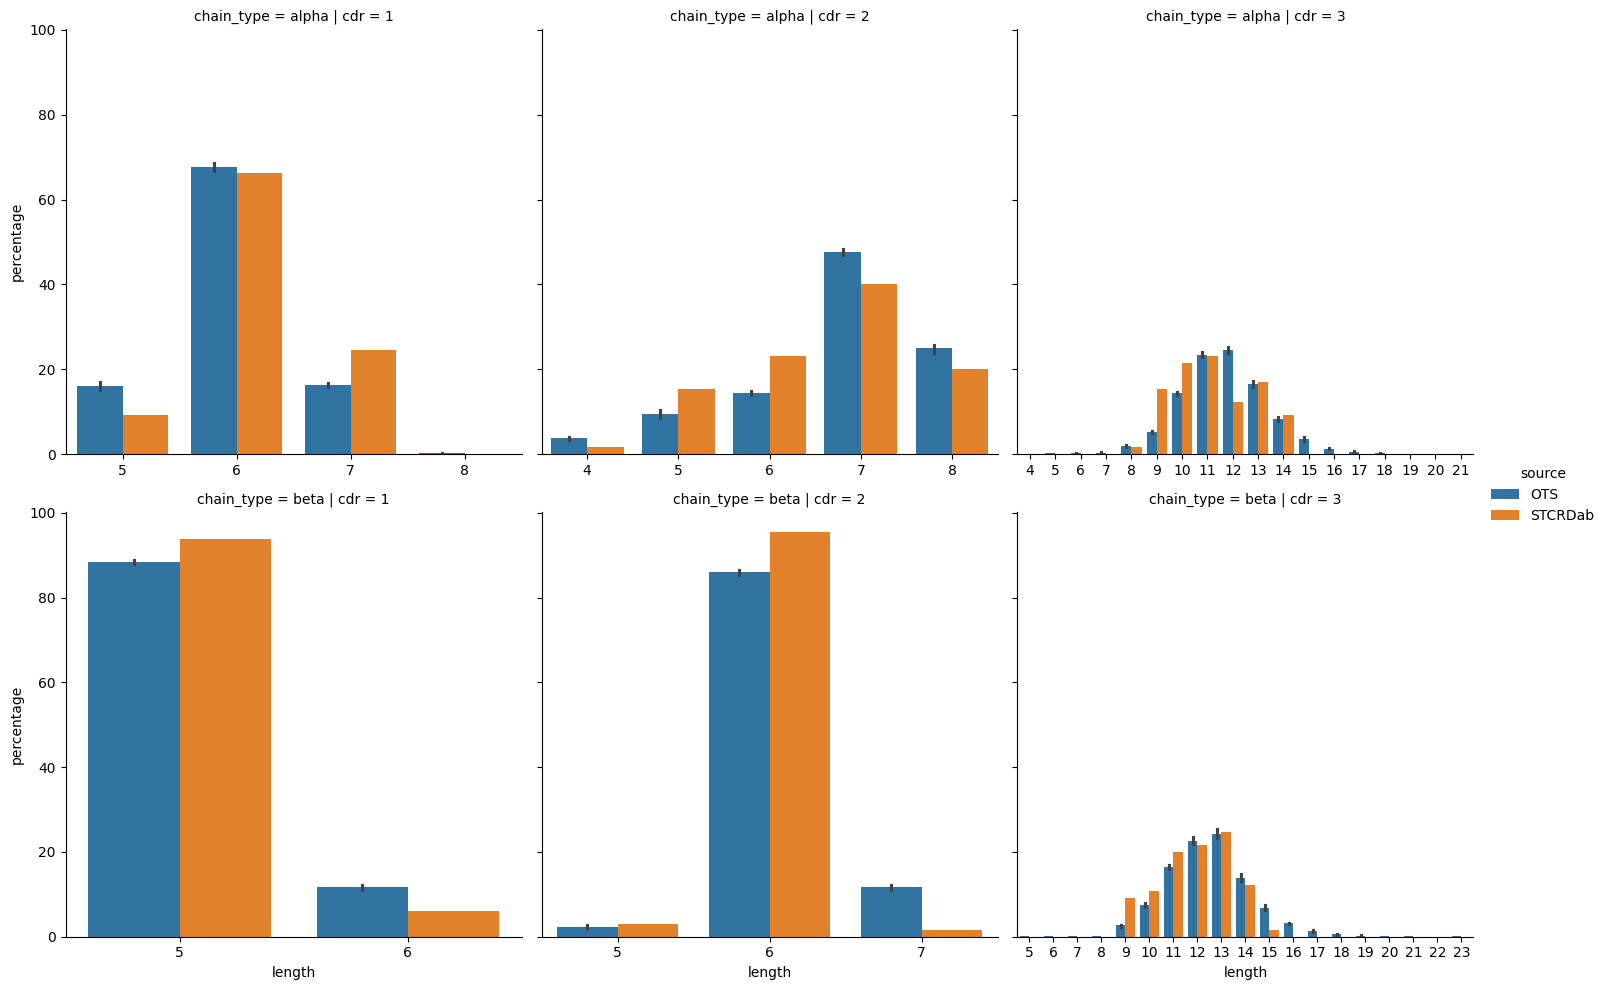

In [17]:
grid = sns.catplot(cdr_length_percentages,
            x='length',
            y='percentage',
            hue='source',
            row='chain_type', col='cdr',
            kind='bar', sharex=False)

plt.show()

In [18]:
cdr_lengths.groupby(['chain_type', 'cdr', 'source'])['length'].agg([pd.Series.mode, 'mean', 'std'])

mode       mean       std
chain_type cdr source                            
alpha      1   OTS         6   6.003800  0.570279
               STCRDab     6   6.153846  0.565430
           2   OTS         7   6.805900  1.031664
               STCRDab     7   6.615385  1.026102
           3   OTS        12  11.730200  1.692954
               STCRDab    11  11.169231  1.616026
beta       1   OTS         5   5.116500  0.320840
               STCRDab     5   5.061538  0.242186
           2   OTS         6   6.092400  0.363147
               STCRDab     6   5.984615  0.215950
           3   OTS        13  12.568400  1.753918
               STCRDab    13  11.846154  1.533285

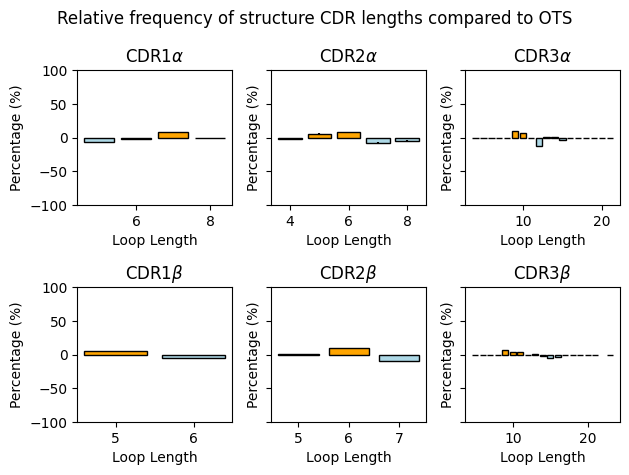

In [19]:
fig, axes = plt.subplots(ncols=3, nrows=2, tight_layout=True, sharey=True)
plt.ylim([-100, 100])
fig.suptitle('Relative frequency of structure CDR lengths compared to OTS')

for i, chain_type in enumerate(('alpha', 'beta')):
    for j, cdr in enumerate(('1', '2', '3')):
        proportion_data = cdr_length_proportions.query("chain_type == @chain_type and cdr == @cdr")
        colors = proportion_data['difference'].map(lambda diff: 'lightblue' if diff < 0 else 'orange')

        axes[i, j].bar(proportion_data['length'], proportion_data['difference'],
                       yerr=proportion_data['percentage_sem'],
                       color=colors, edgecolor='black')

        axes[i, j].set_title(f'CDR{cdr}$\\{chain_type}$')
        axes[i, j].set_xlabel('Loop Length')
        axes[i, j].set_ylabel('Percentage (%)')

plt.show()

In [20]:
for chain_type in ('alpha', 'beta'):
    for cdr in ('1', '2', '3'):
        proportion_data = cdr_length_proportions.query("chain_type == @chain_type and cdr == @cdr")
        print(f'CDR{cdr}{chain_type} RMSD:', round(rmsd(proportion_data['difference']), 2))

print()
print('Overall RMSD:', round(rmsd(cdr_length_proportions['difference']), 2))

CDR1alpha RMSD: 5.44
CDR2alpha RMSD: 6.25
CDR3alpha RMSD: 4.23
CDR1beta RMSD: 5.5
CDR2beta RMSD: 7.99
CDR3beta RMSD: 2.48

Overall RMSD: 4.47


Overall, it seems that the distribution of lengths is similar between the *apo*-*holo* structures taken from the STCRDab and the background TCRs from OTS.
The distributions look similar between the data sources, with a slightly larger variety for the OTS TCRs.
Also, the mode length for each CDR type is the same between the OTS background and the dataset used in this analysis (6 for CDR1α, 7 for CDR2α, 11  for CDR3α, 5 for CDR1β, 6 for CDR2β, and 13 for CDR3β).

# Compare TCR V Gene Usage

In [21]:
ots_sample_genes['source'] = 'OTS'
apo_holo_genes['source'] = 'STCRDab'

gene_usage = pd.concat([ots_sample_genes, apo_holo_genes])
gene_usage = gene_usage.dropna(subset=['alpha_subgroup', 'beta_subgroup'])
gene_usage = gene_usage.melt(id_vars=['sample_num', 'source'],
                             value_vars=['alpha_subgroup', 'beta_subgroup'],
                             var_name='subgroup', value_name='gene')

gene_usage['subgroup_num'] = gene_usage['gene'].str.extract(r'TR[A|B]V(\d+)', expand=False).apply(int)

gene_usage

,sample_num,source,subgroup,gene,subgroup_num
0,1.0,OTS,alpha_subgroup,TRAV26,26
1,1.0,OTS,alpha_subgroup,TRAV29,29
2,1.0,OTS,alpha_subgroup,TRAV24,24
3,1.0,OTS,alpha_subgroup,TRAV8,8
4,1.0,OTS,alpha_subgroup,TRAV1,1
...,...,...,...,...,...
20121,NaN,STCRDab,beta_subgroup,TRBV7,7
20122,NaN,STCRDab,beta_subgroup,TRBV6,6
20123,NaN,STCRDab,beta_subgroup,TRBV6,6
20124,NaN,STCRDab,beta_subgroup,TRBV7,7


In [22]:
gene_usage_percentages = (gene_usage.groupby(['subgroup', 'source', 'sample_num'], dropna=False)
                                    [['gene', 'subgroup_num']]
                                    .value_counts(normalize=True)
                                    * 100)
gene_usage_percentages.name = 'percentage'

gene_usage_percentages = gene_usage_percentages.reset_index()

/var/scratch/bmcmaste/1915160/ipykernel_3725429/351373078.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


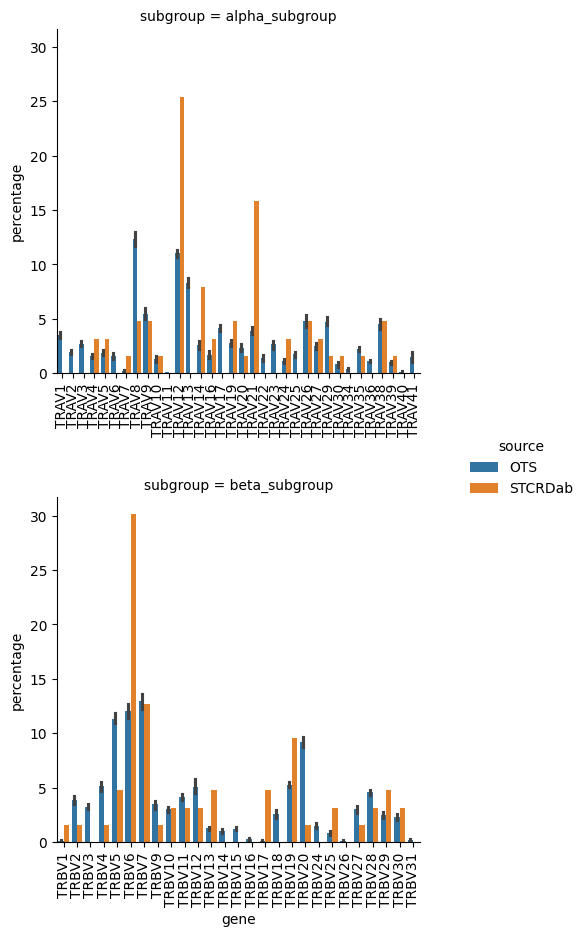

In [23]:
grid = sns.catplot(gene_usage_percentages.sort_values(['subgroup', 'subgroup_num']),
            row='subgroup',
            x='gene', y='percentage',
            hue='source',
            kind='bar',
            sharex=False)

for ax in grid.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

grid.tight_layout(pad=3.0)

plt.show()

In [24]:
ots_sample_gene_usage_percentages = gene_usage_percentages.query("source == 'OTS'")
ots_sample_gene_usage_percentages_agg = (ots_sample_gene_usage_percentages.groupby(['gene', 'subgroup', 'subgroup_num'])
                                                                          .agg({'percentage': ['mean', 'sem']})
                                                                          .reset_index()
                                                                          .fillna(0.0))

ots_sample_gene_usage_percentages_agg.columns = ['_'.join(col).rstrip('_').replace('_mean', '')
                                                 for col in ots_sample_gene_usage_percentages_agg.columns]

In [25]:
apo_holo_gene_usage_percentages = gene_usage_percentages.query("source == 'STCRDab'")
gene_usage_percentages_compare = apo_holo_gene_usage_percentages.merge(ots_sample_gene_usage_percentages_agg,
                                                                       how='outer',
                                                                       on=['gene', 'subgroup', 'subgroup_num'],
                                                                       suffixes=('_stcrdab', '_ots'))

gene_usage_percentages_compare = gene_usage_percentages_compare.drop(['source', 'sample_num'], axis='columns')
gene_usage_percentages_compare = gene_usage_percentages_compare.fillna(0.0)

gene_usage_percentages_compare['difference'] = (gene_usage_percentages_compare['percentage_stcrdab']
                                                - gene_usage_percentages_compare['percentage_ots'])

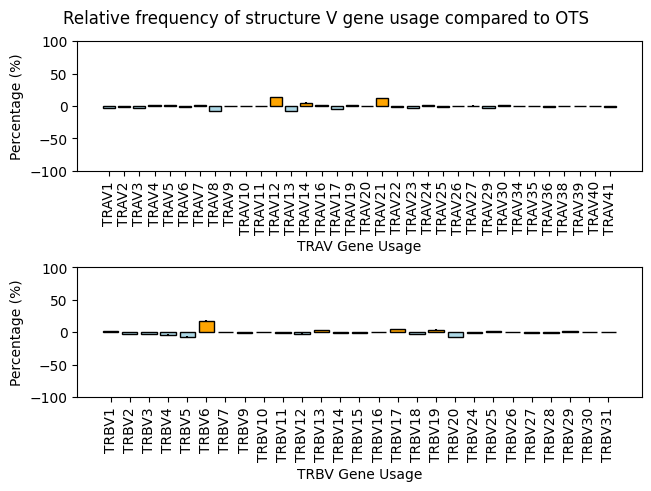

In [26]:
fig, axes = plt.subplots(nrows=2, constrained_layout=True, sharey=True)
plt.ylim([-100, 100])
fig.suptitle('Relative frequency of structure V gene usage compared to OTS')

for i, subgroup in enumerate(('alpha_subgroup', 'beta_subgroup')):
    plot_data = gene_usage_percentages_compare.query('subgroup == @subgroup').sort_values('subgroup_num')

    colors = plot_data['difference'].map(lambda diff: 'lightblue' if diff < 0 else 'orange')

    axes[i].bar(plot_data['gene'],
               plot_data['difference'],
               yerr=plot_data['percentage_sem'],
               color=colors,
               edgecolor='black')

    axes[i].set_xlabel(f"TR{'A' if subgroup == 'alpha_subgroup' else 'B'}V Gene Usage")
    axes[i].set_ylabel('Percentage (%)')
    axes[i].tick_params(axis='x', labelrotation=90)

plt.show()

In [27]:
print('TRAV Gene Usage RMSD:',
      round(rmsd(gene_usage_percentages_compare.query("subgroup == 'alpha_subgroup'")['difference']), 2))

print('TRBV Gene Usage RMSD:',
      round(rmsd(gene_usage_percentages_compare.query("subgroup == 'beta_subgroup'")['difference']), 2))

TRAV Gene Usage RMSD: 4.18
TRBV Gene Usage RMSD: 4.5


The gene usage between *apo*-*holo* TCRs from STCRDab and the background TCRs from OTS is largely similar.
There are a few exceptions in the STCRDab structures that show an over-representation of certain gene usages.
For exampe, TRAV12, TRAV14, TRAV21, and TRBV6 all seem to be in higher abundance in the STCRDab data compared with the OTS background.

# Comparison of amino acide types in loops

In [28]:
AMINO_ACIDS = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

def count_amino_acids(residues: pd.Series, normalize = True) -> pd.Series:
    counts = {res: 0 for res in AMINO_ACIDS}

    for res in residues.tolist():
        counts[res] += 1

    if normalize:
        num_residues = len(residues)
        counts = {res: count / num_residues for res, count in counts.items()}

    counts = pd.Series(counts)
    counts.name = 'count' if not normalize else 'proportion'
    counts.index.name = 'residue'

    return counts

In [29]:
ots_sample_cdrs_residues = ots_sample_cdrs[['sample_num', 'chain_type', 'cdr', 'sequence']].copy()
ots_sample_cdrs_residues['residue'] = ots_sample_cdrs_residues['sequence'].map(list)
ots_sample_cdrs_residues = ots_sample_cdrs_residues.explode('residue')

ots_sample_cdrs_residues_counts = (ots_sample_cdrs_residues.groupby(['sample_num', 'chain_type', 'cdr'])
                                                            ['residue']
                                                            .apply(count_amino_acids))
ots_sample_cdrs_residues_counts.name = 'proportion'
ots_sample_cdrs_residues_counts = ots_sample_cdrs_residues_counts.to_frame()
ots_sample_cdrs_residues_counts = ots_sample_cdrs_residues_counts.reset_index()

ots_sample_cdrs_residues_counts

,sample_num,chain_type,cdr,residue,proportion
0,1,alpha,1,A,0.067791
1,1,alpha,1,C,0.000000
2,1,alpha,1,D,0.062615
3,1,alpha,1,E,0.014527
4,1,alpha,1,F,0.033228
...,...,...,...,...,...
1195,10,beta,3,S,0.181695
1196,10,beta,3,T,0.073013
1197,10,beta,3,V,0.021305
1198,10,beta,3,W,0.006623


In [30]:
ots_sample_cdrs_residues_counts_agg = (ots_sample_cdrs_residues_counts.groupby(['chain_type', 'cdr', 'residue'])
                                                                      .agg({'proportion': ['mean', 'sem']})
                                                                      .reset_index())

ots_sample_cdrs_residues_counts_agg.columns = ['_'.join(col).rstrip('_').replace('_mean', '')
                                               for col in ots_sample_cdrs_residues_counts_agg.columns]

In [31]:
apo_holo_cdr_sequences_residues = apo_holo_cdr_sequences[['chain_type', 'cdr', 'sequence']].copy()
apo_holo_cdr_sequences_residues['residue'] = apo_holo_cdr_sequences_residues['sequence'].map(list)
apo_holo_cdr_sequences_residues = apo_holo_cdr_sequences_residues.explode('residue')

apo_holo_cdr_sequences_residues_counts = (apo_holo_cdr_sequences_residues.groupby(['chain_type', 'cdr'])
                                          ['residue']
                                          .apply(count_amino_acids))

apo_holo_cdr_sequences_residues_counts.name = 'proportion'
apo_holo_cdr_sequences_residues_counts = apo_holo_cdr_sequences_residues_counts.to_frame()
apo_holo_cdr_sequences_residues_counts = apo_holo_cdr_sequences_residues_counts.reset_index()

apo_holo_cdr_sequences_residues_counts

,chain_type,cdr,residue,proportion
0,alpha,1,A,0.057500
1,alpha,1,C,0.000000
2,alpha,1,D,0.092500
3,alpha,1,E,0.022500
4,alpha,1,F,0.035000
...,...,...,...,...
115,beta,3,S,0.180519
116,beta,3,T,0.059740
117,beta,3,V,0.019481
118,beta,3,W,0.011688


In [32]:
ots_sample_cdrs_residues_counts_agg['source'] = 'ots'
apo_holo_cdr_sequences_residues_counts['source'] = 'stcrdab'

cdr_residue_counts = pd.concat([ots_sample_cdrs_residues_counts_agg, apo_holo_cdr_sequences_residues_counts])

In [33]:
angles = np.linspace(0, 2 * np.pi, len(AMINO_ACIDS), endpoint=False).tolist()
amino_acid_angles = dict(zip(AMINO_ACIDS, angles))

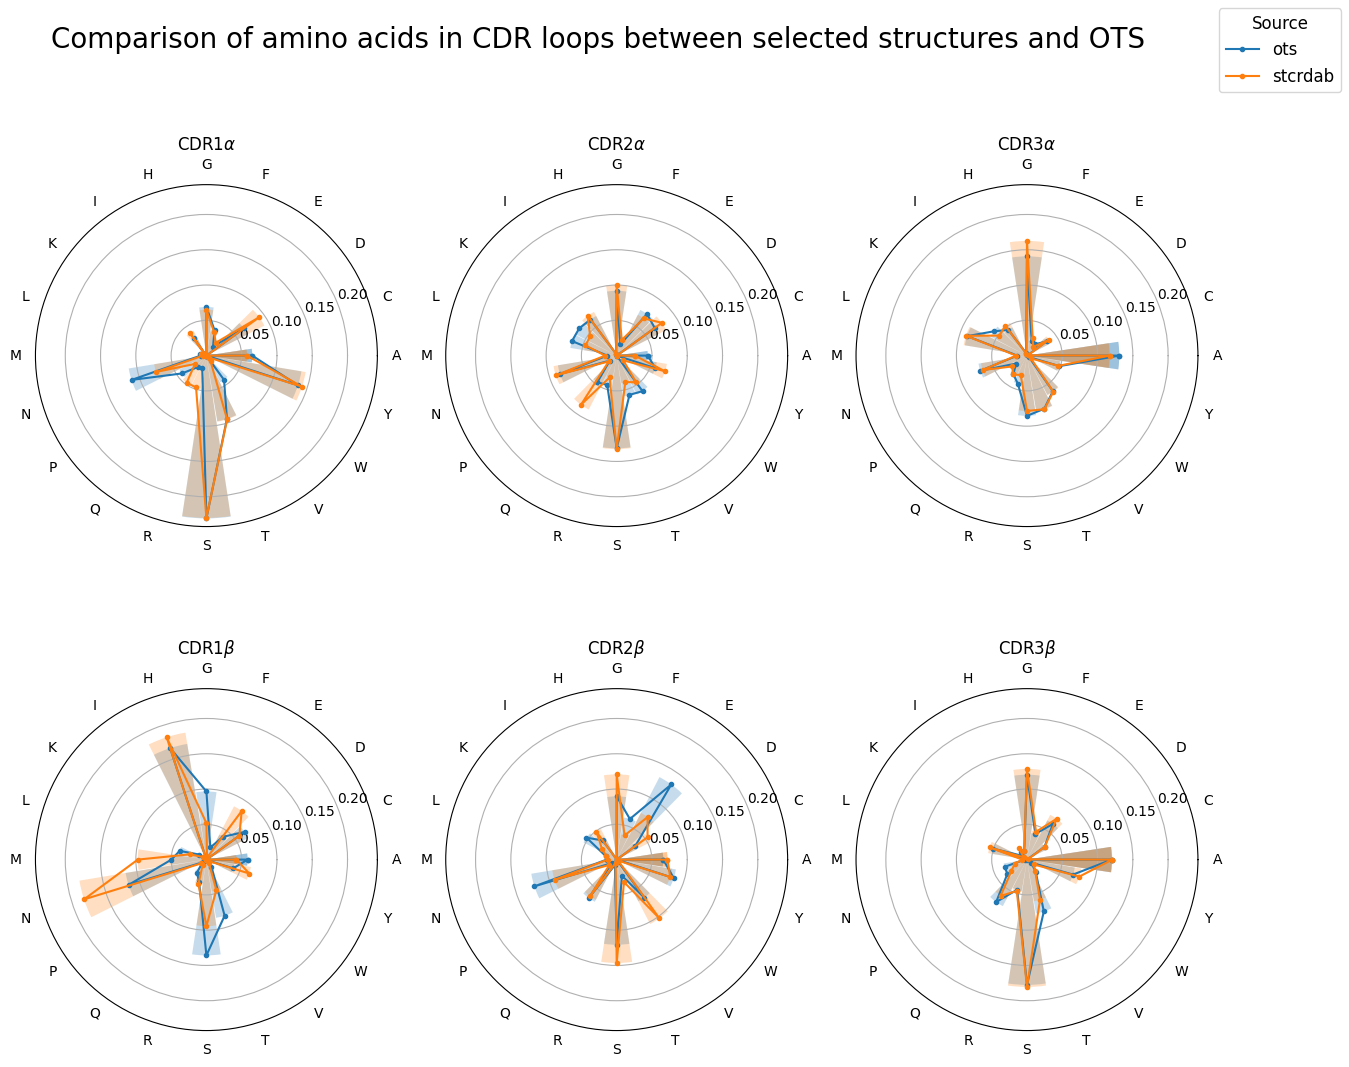

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=3,
                         figsize=(15, 12),
                         sharey=True,
                         subplot_kw={'projection': 'polar'})

lines = []
for i, chain_type in enumerate(('alpha', 'beta')):
    for j, cdr in enumerate(('1', '2', '3')):
        for source in 'ots', 'stcrdab':
            residue_counts = cdr_residue_counts[(cdr_residue_counts['source'] == source)
                                                & (cdr_residue_counts['chain_type'] == chain_type)
                                                & (cdr_residue_counts['cdr'] == cdr)].sort_values('residue')

            proportions = residue_counts['proportion'].tolist()
            label_angles = residue_counts['residue'].map(amino_acid_angles).tolist()

            # Join ends
            proportions.append(proportions[0])
            label_angles.append(label_angles[0])

            line, = axes[i, j].plot(label_angles, proportions, marker='o', markersize=3, label=source)
            axes[i, j].bar(label_angles, proportions, alpha=0.25, width=0.3)

            lines.append(line)

        axes[i, j].set_xticks(angles)
        axes[i, j].set_xticklabels(AMINO_ACIDS)
        axes[i, j].grid(which='major', axis='x', visible=False)

        axes[i, j].set_title(f'CDR{cdr}$\\{chain_type}$')

unique_handles_labels = {}
for line in lines:
    label = line.get_label()
    if label not in unique_handles_labels:
        unique_handles_labels[label] = line

labels, handles = zip(*unique_handles_labels.items())

legend = fig.legend(handles, labels, title='Source', fontsize='large')
legend.get_title().set_fontsize('large')

fig.suptitle('Comparison of amino acids in CDR loops between selected structures and OTS',
             fontsize=20)

plt.show()

In [35]:
cdr_residue_counts_compare = cdr_residue_counts.pivot(index=['chain_type', 'cdr', 'residue'],
                                                      columns='source',
                                                      values='proportion').reset_index()

cdr_residue_counts_compare['difference'] = cdr_residue_counts_compare['stcrdab'] - cdr_residue_counts_compare['ots']

print(cdr_residue_counts_compare.groupby(['chain_type', 'cdr'])['difference'].agg(rmsd))

print(f"Overall RMSD: {rmsd(cdr_residue_counts_compare['difference']):.2e}")

chain_type  cdr
alpha       1      0.016588
            2      0.014409
            3      0.007707
beta        1      0.028133
            2      0.021649
            3      0.007354
Name: difference, dtype: float64
Overall RMSD: 1.76e-02


# Selected structures coverage of canonical classes

In [36]:
cdr_clusters = pd.read_csv('../data/processed/stcrdab_clusters.csv')
cdr_clusters

,name,cluster,chain_type,cdr,sequence,cluster_type
0,7zt2_DE,12,alpha_chain,1,TSGFNG,pseudo
1,7zt3_DE,12,alpha_chain,1,TSGFNG,pseudo
2,7zt4_DE,12,alpha_chain,1,TSGFNG,pseudo
3,7zt5_DE,12,alpha_chain,1,TSGFNG,pseudo
4,7zt7_DE,12,alpha_chain,1,TSGFNG,pseudo
...,...,...,...,...,...,...
4807,6miv_CD,22,beta_chain,3,ASGDEGYTQY,canonical
4808,3rtq_CD,22,beta_chain,3,ASGDEGYTQY,canonical
4809,3dxa_NO,noise,beta_chain,3,ASRYRDDSYNEQF,NaN
4810,1d9k_AB,noise,beta_chain,3,ASGGQGRAEQF,NaN


In [37]:
cdr_clusters[['pdb_id', 'chains']] = cdr_clusters['name'].str.split('_').apply(pd.Series)
cdr_clusters[['alpha_chain', 'beta_chain']] = cdr_clusters['chains'].apply(list).apply(pd.Series)

In [38]:
common_columns = ['pdb_id', 'alpha_chain', 'beta_chain']
apo_holo_index = pd.MultiIndex.from_frame(apo_holo_summary[common_columns])

cdr_clusters['in_apo_holo'] = cdr_clusters[common_columns].apply(tuple, axis=1).isin(apo_holo_index)

In [39]:
canonical_cdr_clusters = cdr_clusters.query("cluster_type == 'canonical'").copy().reset_index(drop=True)
canonical_cdr_clusters['cluster_num'] = canonical_cdr_clusters['cluster'].map(int)

In [40]:
grouped = (canonical_cdr_clusters.groupby(['chain_type', 'cdr', 'cluster', 'in_apo_holo'])
                                 .size()
                                 .reset_index(name='count'))
total_counts = (canonical_cdr_clusters.groupby(['chain_type', 'cdr'])
                                      .size()
                                      .reset_index(name='total_count'))

grouped = grouped.merge(total_counts, on=['chain_type', 'cdr'])
grouped['percent'] = grouped['count'] / grouped['total_count'] * 100

In [41]:
grouped['cluster_num'] = grouped['cluster'].apply(int)
grouped = grouped.sort_values('cluster_num')

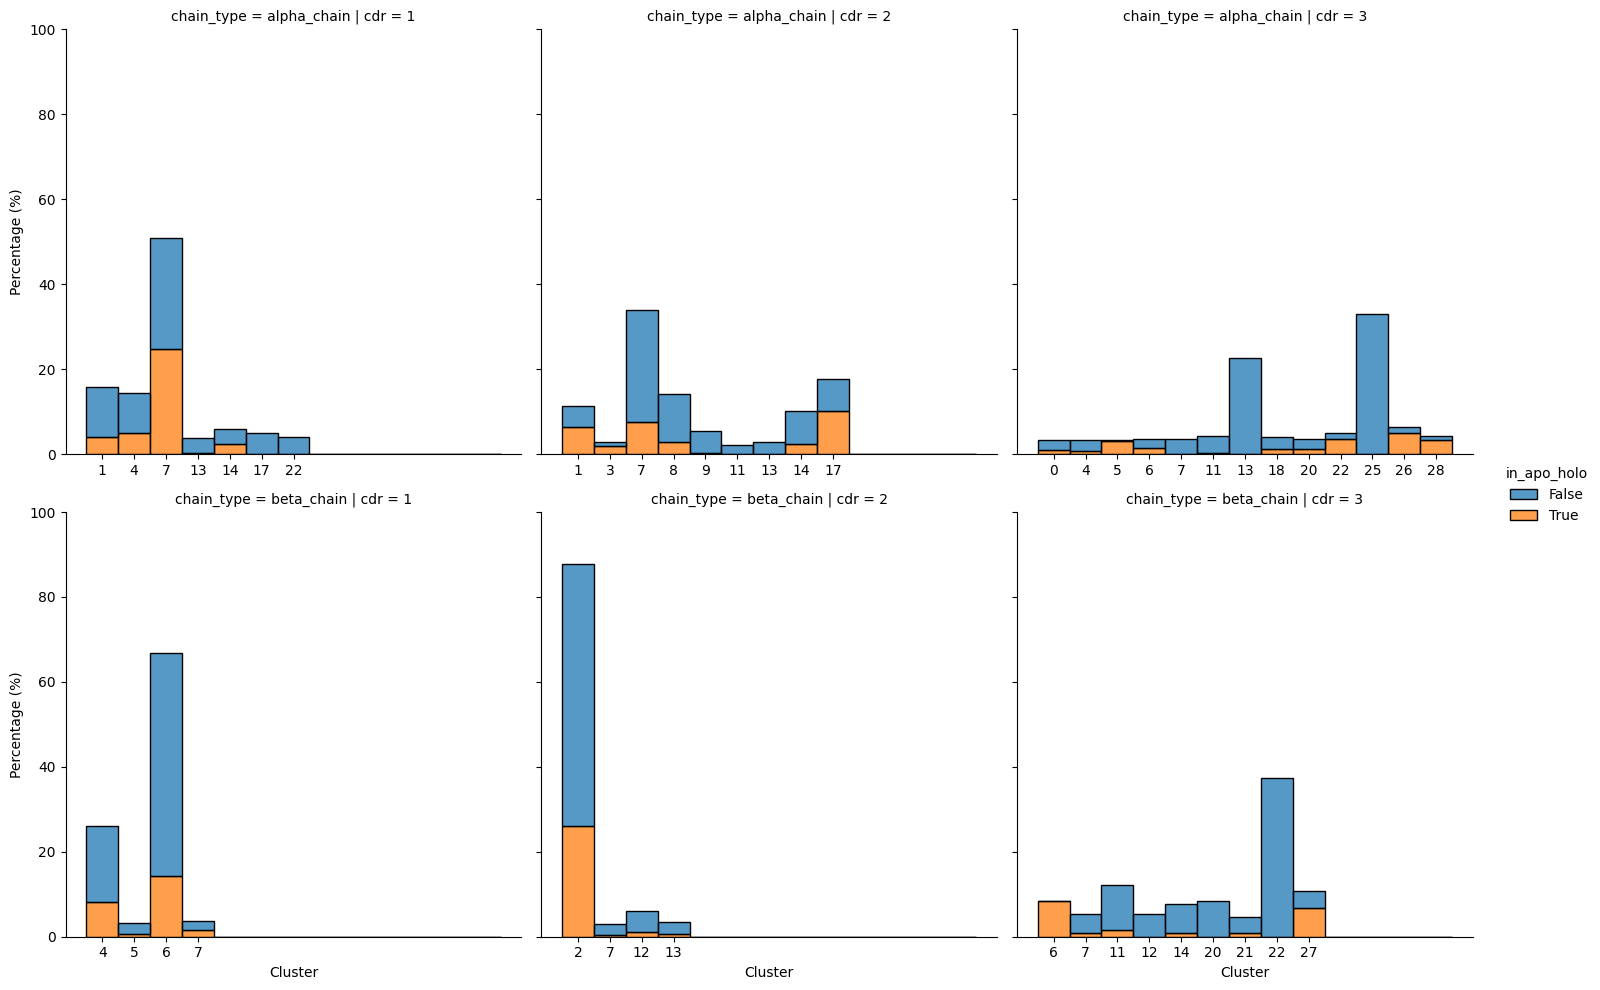

In [43]:
grid = sns.displot(grouped,
                   row='chain_type', col='cdr',
                   x='cluster',
                   weights='percent',
                   hue='in_apo_holo', multiple='stack',
                   facet_kws=dict(sharex=False))

grid.set_axis_labels("Cluster", "Percentage (%)")
grid.set(ylim=(0, 100))

plt.show()

In [42]:
apo_holo_coverage = (canonical_cdr_clusters.groupby(['chain_type', 'cdr', 'cluster'])
                                           .apply(lambda group: group['in_apo_holo'].any())
                                           .value_counts(normalize=True) * 100)[True]

print(f'There is {apo_holo_coverage:.2f}% coverage of canonical clusters in the apo-holo dataset.')

There is 78.26% coverage of canonical clusters in the apo-holo dataset.


# Conclusion

Our analysis here shows that the conclusions drawn about TCRs from our structural analysis in this project should generalise well to other TCR:pMHC-I interactions where structure information is not currently available.
The comparisons here show that the distribution of CDR lengths, amino acid compisition of CDR loops, and generally the distribution of V gene usage is comparable between the selected STCRDab structures and the background of TCRs sampled from OTS.
However, it does seem that there is some over representation bias of certain V genes which may affect results.
The analysis also shows that canonical CDR loop clusters are well represented in the selected analysis.
We did not look at amino acid composition and other possible comparable properties from these sequences that could be done.